In [17]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import dataloader

Using TensorFlow backend.


In [9]:
# Get the data
all_data, all_labels, all_files, one_file = dataloader.main()

Loading Kaggle cats and dogs
0
100
200


In [24]:
from scipy.io import wavfile as wav

def display_wav(wav_file):
    #librosa_load, librosa_sampling_rate = librosa.load(wav_file)
    #scipy_sampling_rate, scipy_load = wav.read(wav_file)
    plt.figure(figsize=(12, 4))
    #plt.plot(scipy_load)
    plt.plot(wav_file)
    
import wave

def plot_wav(wav_file):
    spf = wave.open(wav_file, "r")

    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")

    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.show()

## Audio Preprocessing

In [ ]:
# Listen to the wav file
import IPython.display as ipd
ipd.Audio(one_file)

Original audio file:
Noise removed audio file:


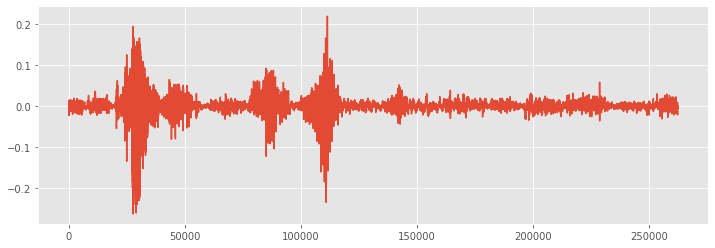

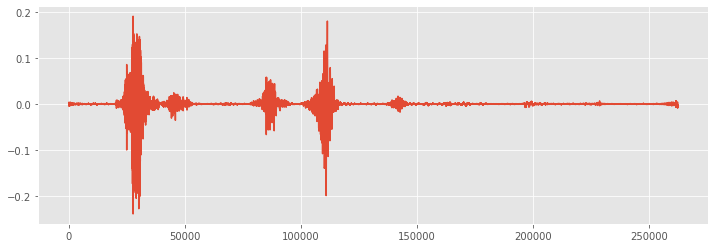

In [27]:
# Visualize noise reduction
import librosa
import noisereduce as nr

# Load audio file
audio_data, sampling_rate = librosa.load(one_file)

# Noise reduction
noisy_part = audio_data[0:25000]  
reduced_noise = nr.reduce_noise(audio_clip=audio_data, noise_clip=noisy_part, verbose=False)

# Visualize
print("Original audio file:")
display_wav(audio_data)
print("Noise removed audio file:")
display_wav(reduced_noise)

Trimmed audio file:


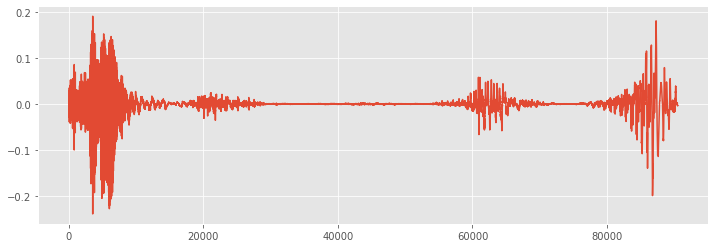

In [32]:
# Trim unnecessary silence
trimmed, index = librosa.effects.trim(reduced_noise, top_db=20, frame_length=512, hop_length=64)
print("Trimmed audio file:")
display_wav(trimmed)